# $\xi_{\rm mm}$ emulator

This notebook contains an example script of how to use the emulator for the matter-matter autocorrelation function (most simply known as the matter correlation function). As a reminder, the matter correlation function is the Fourier transform of the matter power spectrum $P(k,z)$:
$$
\xi_{\rm mm}(r,z) = \frac{1}{2\pi^2}\int_0^{\infty} \frac{{\rm d}k}{k}\ k^3P(k,z)|W(kr)|^2\,,
$$
where both the correlation function and power spectrum are defined at a specific redshift $z$. $W(kr)$ is the Fourier transform of a real space top-hat window function. Folks have alread made very accurate emulators for the power spectrum, however accuracy in Fourier space doesn't guarantee accuracy in real space. For this reason, you are interested in using this matter correlation function emulator. This can be due to inaccuracies at certain scales, numerical noise in the transformation, or worries about extrapolating the power spectrum in order to compute the integral. Whatever the case may be, if you need $\xi_{\rm mm}$, this is the right tool for you.

## In this notebook

you will find an example of how to call the emulator. Additionally, I will provide some of the testing data to demonstrate the accuracy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ximm_emulator import *
%matplotlib inline

### A simple example of how to call the emulator

In [2]:
#Define a cosmology. This is an array that has
#Omega_b*h^2, Omega_cdm*h^2, w_0, n_s, ln(10^10 * A_s), H0, N_eff
cosmology = np.array([ 2.32629e-02, 1.07830e-01, -7.26513e-01, 9.80515e-01, 
                      3.03895e+00, 6.32317e+01, 2.95000e+00])

In [3]:
#Make the emulator object
emu = ximm_emulator(cosmology)

CLASS is computing
	CLASS done


In [4]:
#Predict xi_mm.
#Note: the emulator outputs xi_mm at 10 redshifts.
#In the future you will be able to query the emulator for the curve at an arbitrary redshift.
xi_mm = emu.predict(cosmology) #Don't need to give the cosmology here, but just trying to be clear
#Note: the correlation function is at 50 specific radii between 0.1 and 75 Mpc/h.
radii = emu.get_radii()
redshifts = emu.get_redshifts()

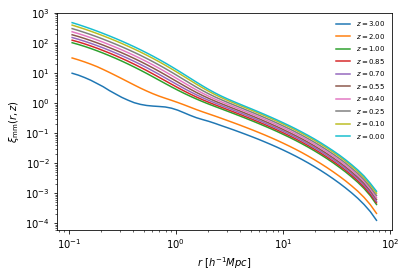

In [5]:
#Plot everything
for i in range(len(redshifts)):
    plt.loglog(radii, xi_mm[i], label=r"$z=%.2f$"%redshifts[i])
plt.xlabel(r"$r\ [h^{-1}{Mpc}]$")
plt.ylabel(r"$\xi_{\rm mm}(r,z)$")
plt.legend(loc=0, frameon=False, fontsize=7)